In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
base_path = 'https://raw.githubusercontent.com/frandiego/data/master/mnist01.csv'

In [3]:
df = pd.read_csv(base_path)

In [4]:
df = df.sample(1000)

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8063,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1193,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1158,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7764,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6164,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df = df.astype(int)

In [7]:
y = df["label"]
X = df.drop("label",axis = 1)

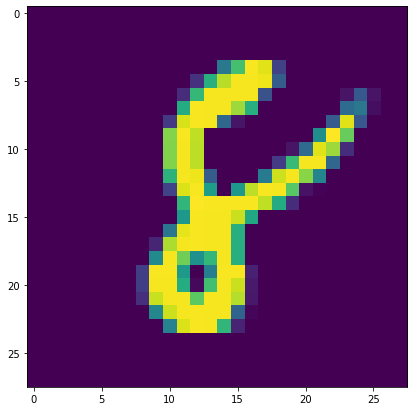

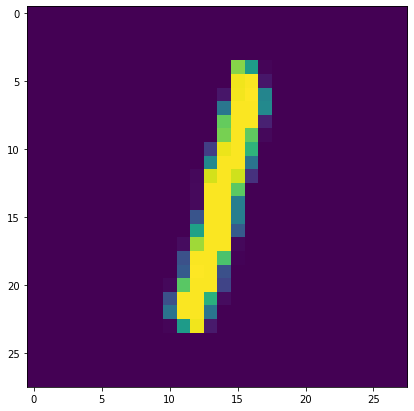

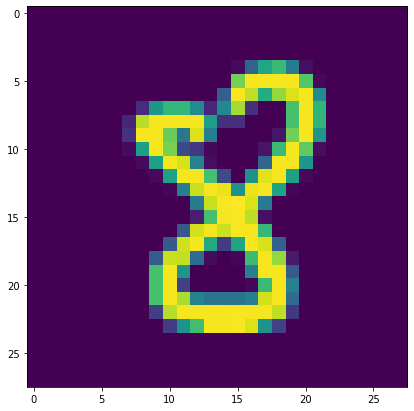

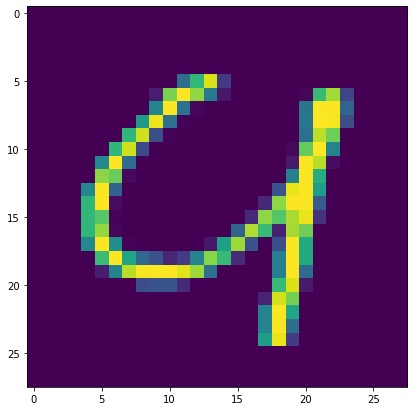

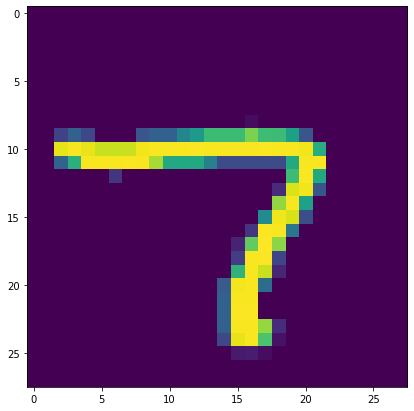

In [8]:
# Let's display some data points
for i in range(5):
    row_to_mat = X.iloc[i].values.reshape(28,28)
    plt.figure(figsize=(7,7))
    plt.imshow(row_to_mat)    
    plt.show()

# 2D Visualization using PCA

## PCA using Scikit-Learn.
* Using a PCA(2) over data in X, visualize a scatter plot of PC1 vs PC2

In [9]:
from sklearn import decomposition
pca = decomposition.PCA()

In [ ]:
# your code here

This visual PCA output is roughly the same as the previous one with 90° rotation (still has lot of overlap).

# PCA for dimensionality reduction (only)

Objective: Determine the minimum number of principal components such that the transformation of the data to the new space keeps a desirable explained original variance

* Plot the variance ratio and the cumulative variance ratio vs the number of PCs

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA(100)
# your code here


###### Observations : 
1. 100 nodes enable us to retain roughly 90% of original variance explained while transforming our MNIST data form 784-D space to a space of of 200 principal components gets 95% of original variance explained(informations about original data)
2. PCA cares about the directions that maximize variance. It preserves/cares about the global structure the data. It doesn't care about the local structure of data or the distance between data points. So let's move on to explore t-SNE approach ! 

### Philosophy behind t-SNE
1. Taking care about distance separating the different data points in the original high dimensional data. 
2. Trying to preserve the neighborhoods of data points while embedding them into the less dimensinal space. (It litterally does a neighborhood preserving embedding)
3. t-SNE depends on two main parameters namely "perplexity"(neighborhoods) and "step" (number of iterations)
4. t-SNE tries to shrink sparse clusters and expand dense ones.
5. t-SNE does not preserve distances between clusters
6. More the step and perplexity (# of neighbors to preserve)parameters are well selected, better and closer the shape and the structure/topology of will be.
7. Good Perplexity and step (number of iterations) give stable/same results even when we run t-SNE multiple times. When results change then t-SNE parameters should be tuned.


## t-SNE using scikit-learn

In [ ]:
from sklearn.manifold import TSNE
# Our tsne model transforms 784-dimensional data to 2-D space. Fixing "random_state" helps stabilize tsne model outputs
# set random_state = 0
# your code here

### Let's increase the perplexity and number of iterations
### t-SNE on MNIST data with perplexity = 50, step = n_iter = 5000


### Observations:
* Well as it is shown above, t-SNE performs far better than PCA while visualizing the embeddings in the new 2D space defined only by two components.
* Clusters representing digits form 0 to 9 are easily detectable now. Of course there are still some overlaps here and there (maybe we have to increase and modify our t-SNE parameters and see what it gives as a visual output).
* The constraint here computation time (tSNE is an algoritnm that has a relative high computation cost

# perplexity, 
this parameter allow the algorithm to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.